<a href="https://colab.research.google.com/github/CODERdeeps/MLCDAC/blob/main/KNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

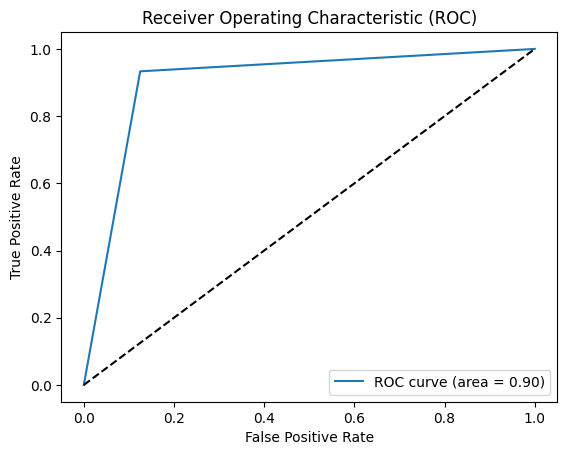

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/RidingMowers.csv')

# Visualize the data using Matplotlib
# Perform appropriate data visualization based on the dataset attributes/features

# Split the data into features (X) and target (y)
X = df.drop('Response', axis=1)  # Replace 'target_column_name' with the actual target column name
y = df['Response']  # Replace 'target_column_name' with the actual target column name

# Encode categorical target values into binary labels
le = LabelEncoder()
y = le.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Set the desired number of neighbors
knn.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = knn.predict(X_test)

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
